In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

In [ ]:

predata_df = pd.read_csv('file-1.csv')
print(predata_df.head(5))


     id     platform      mood  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                            sentence  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [3]:
import nltk
from nltk.corpus import stopwords

# nltk stopwords indir
nltk.download('stopwords')

# Türkçe stopword'leri al
stopwords = set(stopwords.words('english'))

print("Num of count: ",len(stopwords))


Num of count:  198


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
pf_names = predata_df['platform'].unique()
pf_names = [x.lower() for x in pf_names]

In [5]:
# Yeni stopwords eklemek için custom_stopwords listesi oluştur
custom_stopwords = ['rt', 'amp', 'http', 'https', 'co', 'com', 'im']  # eklemek istediğiniz kelimeleri buraya yazın

# Mevcut stopwords'e yeni kelimeleri ekle
stopwords.update(custom_stopwords)
stopwords.update(pf_names)

# Kontrol etmek için
print("Toplam stopwords sayısı:", len(stopwords))


Toplam stopwords sayısı: 237


In [6]:
import string

def preprocess_text(text, stopwords):
    # Küçük harfe çevir
    text = text.lower()
    # Noktalama işaretlerini kaldır
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Stopwords'leri temizle
    processed_text = ' '.join([word for word in text.split() if word not in stopwords])
    return processed_text



In [7]:
# Örnek kullanım
predata_df['processed_sentence'] = predata_df['sentence'].apply(lambda x: preprocess_text(x, stopwords) if isinstance(x, str) else "")
print(predata_df[['sentence', 'processed_sentence']].head(5))

                                            sentence   processed_sentence
0  im getting on borderlands and i will murder yo...       getting murder
1  I am coming to the borders and I will kill you...  coming borders kill
2  im getting on borderlands and i will kill you ...         getting kill
3  im coming on borderlands and i will murder you...        coming murder
4  im getting on borderlands 2 and i will murder ...     getting 2 murder


In [8]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(predata_df['processed_sentence'][:15000])

# Tokenize edilmiş kelimeleri görmek için:
# print(vectorizer.get_feature_names_out())

In [10]:
predata_df = predata_df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, predata_df['mood'][:15000], test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 12000
Test set size: 3000


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Modelleri bir sözlükte tanımla
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Modelleri eğit ve sonuçları sakla
trained_models = {}
for model_name, model in models.items():
    print(f"Eğitiliyor: {model_name}")
    model.fit(X_train, y_train)
    trained_models[model_name] = model
    print(f"{model_name} eğitildi.\n")

Eğitiliyor: Naive Bayes
Naive Bayes eğitildi.

Eğitiliyor: Logistic Regression
Logistic Regression eğitildi.

Eğitiliyor: Decision Tree
Decision Tree eğitildi.

Eğitiliyor: Random Forest
Random Forest eğitildi.



Model: Naive Bayes
Accuracy: 0.26
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.16      0.10      0.12       521
    Negative       0.30      0.38      0.34       932
     Neutral       0.24      0.22      0.23       718
    Positive       0.26      0.27      0.26       829

    accuracy                           0.26      3000
   macro avg       0.24      0.24      0.24      3000
weighted avg       0.25      0.26      0.25      3000



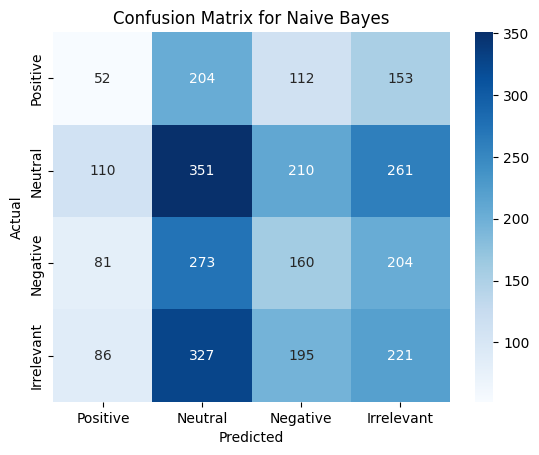


--------------------------------------------------

Model: Logistic Regression
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.19      0.14      0.16       521
    Negative       0.30      0.37      0.33       932
     Neutral       0.24      0.23      0.24       718
    Positive       0.28      0.26      0.27       829

    accuracy                           0.27      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.26      0.27      0.26      3000



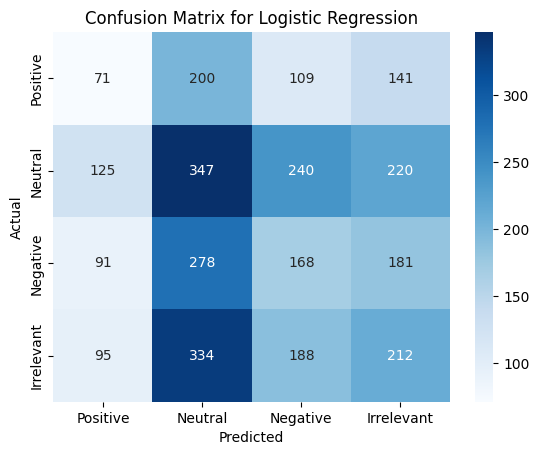


--------------------------------------------------

Model: Decision Tree
Accuracy: 0.26
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.18      0.18      0.18       521
    Negative       0.30      0.35      0.33       932
     Neutral       0.23      0.23      0.23       718
    Positive       0.28      0.23      0.25       829

    accuracy                           0.26      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.26      0.26      0.26      3000



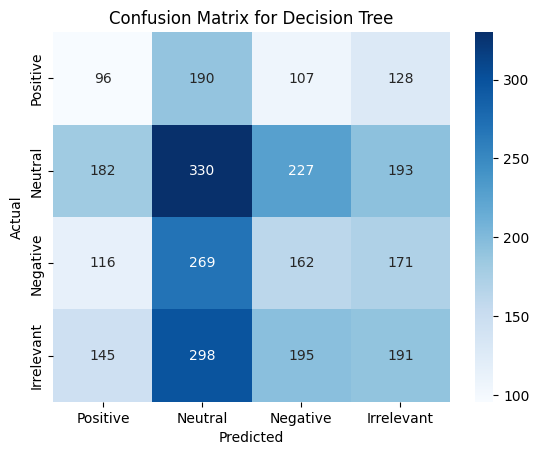


--------------------------------------------------

Model: Random Forest
Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.18      0.14      0.15       521
    Negative       0.30      0.34      0.32       932
     Neutral       0.23      0.23      0.23       718
    Positive       0.30      0.30      0.30       829

    accuracy                           0.27      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.26      0.27      0.26      3000



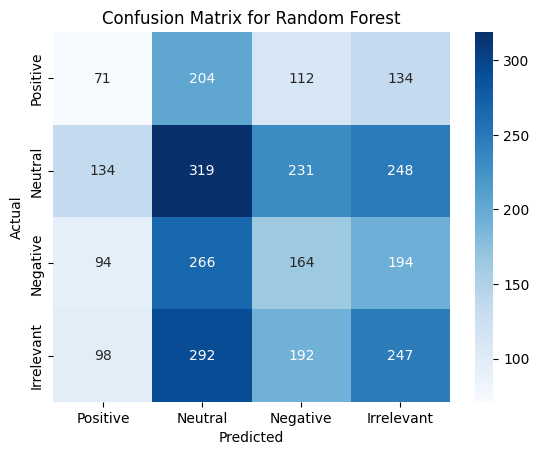


--------------------------------------------------



In [14]:
# Modelleri test et ve sonuçları yazdır
for model_name, model in trained_models.items():
    print(f"Model: {model_name}")
    
    # Tahmin yap
    y_pred = model.predict(X_test)
    
    # Accuracy score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    print("\n" + "-"*50 + "\n")